<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Satellite Image Data <br><br><br>Analysis using numpy</p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>Data Source: Satellite Image from WIFIRE Project</p>


WIFIRE is an integrated system for wildfire analysis, with specific regard to changing urban dynamics and climate. The system integrates networked observations such as heterogeneous satellite data and real-time remote sensor data, with computational techniques in signal processing, visualization, modeling, and data assimilation to provide a scalable method to monitor such phenomena as weather patterns that can help predict a wildfire's rate of spread. You can read more about WIFIRE at: https://wifire.ucsd.edu/

In this example, we will analyze a sample satellite image dataset from WIFIRE using the numpy Library. We will provide masked images of different zones of wildfire spread, the areas which are going to be affected next, and the safe zones to deploy and direct the firemen to.


### Importing Libraries we need:

In [2]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
%matplotlib inline
import imageio
from skimage import data

In [65]:
image_data = imageio.imread('./sd-3layers.jpg')

In [6]:
print(type(image_data))

<class 'imageio.core.util.Array'>


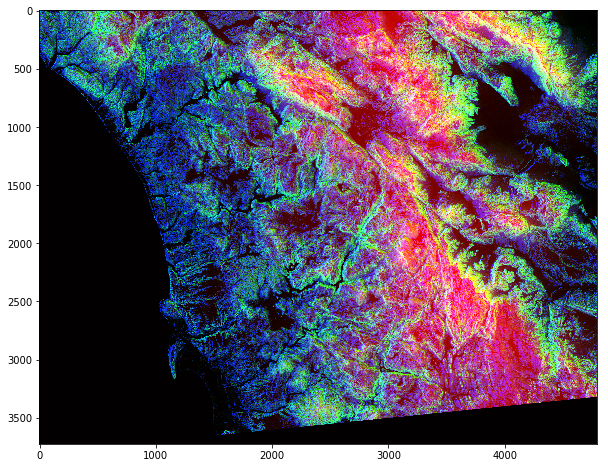

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(image_data)

In [10]:
image_data.shape

(3725, 4797, 3)

In [11]:
image_data.size

53606475

In [12]:
image_data.max()

255

In [13]:
image_data.min()

0

In [14]:
image_data.mean()

75.8299354508947

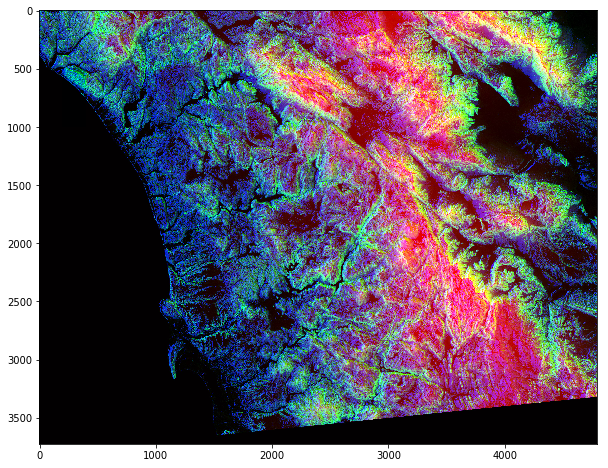

In [28]:
fil = image_data[500:1000, 200:400,0]
plt.figure(figsize=(10,10))
plt.imshow(image_data)

## To show the burning areas:

In [29]:
burn_image = image_data

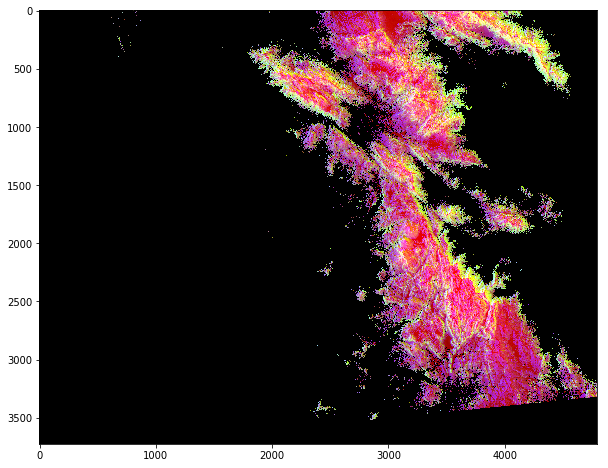

In [31]:
red_mask = burn_image[:,:,0] < 150
burn_image[red_mask] = 0
plt.figure(figsize=(10,10))
plt.imshow(burn_image)

## Areas that are not affected but are hot and likely to be affected:

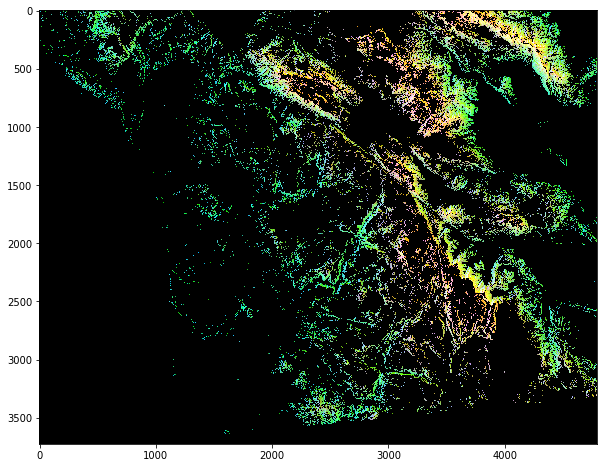

In [57]:
green_image = image_data
green_mask = green_image[:,:,1] < 120
green_image[green_mask] = 0
plt.figure(figsize=(10,10))
plt.imshow(green_image)

## Areas not to deploy Firemen:

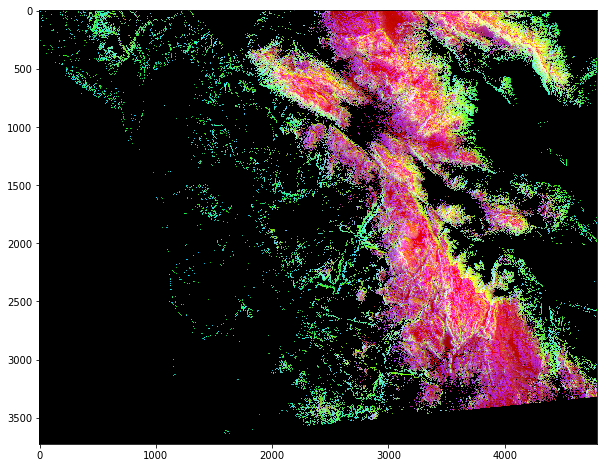

In [52]:
safe_image = image_data
green_mask = image_data[:,:,1] < 180
safe_image[red_mask & green_mask] = 0
plt.figure(figsize = (10,10))
plt.imshow(safe_image)

## Safe areas to deploy firemen:
The areas that are highlighted in green are those that are risky and next to be lighted up by the fire. However, to stop the wildfire from spreading, the firemen can use a method called Backfiring. In this method, since the green areas are already high in temperature, they can be lighted up to counter the wildfire. The firemen must be deployed in the blue areas in the east so that they can return via the same safe passage to the boats waiting for them in the water body(black area).

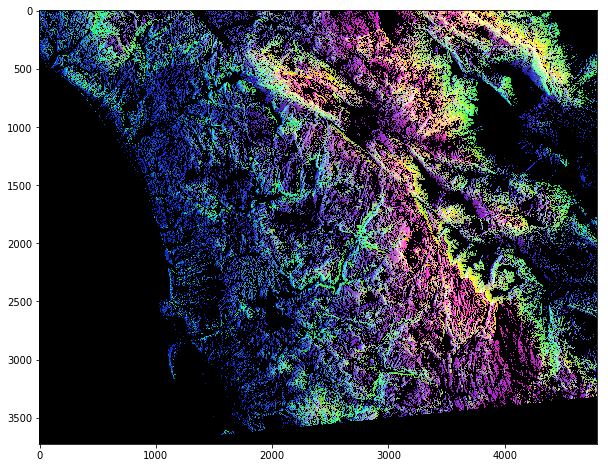

In [66]:
cool_image = image_data
blue_mask = cool_image[:,:,2] < 150
cool_image[blue_mask & green_mask] = 0
plt.figure(figsize=(10,10))
plt.imshow(cool_image)

## Real time image with wildfire area enhanced:

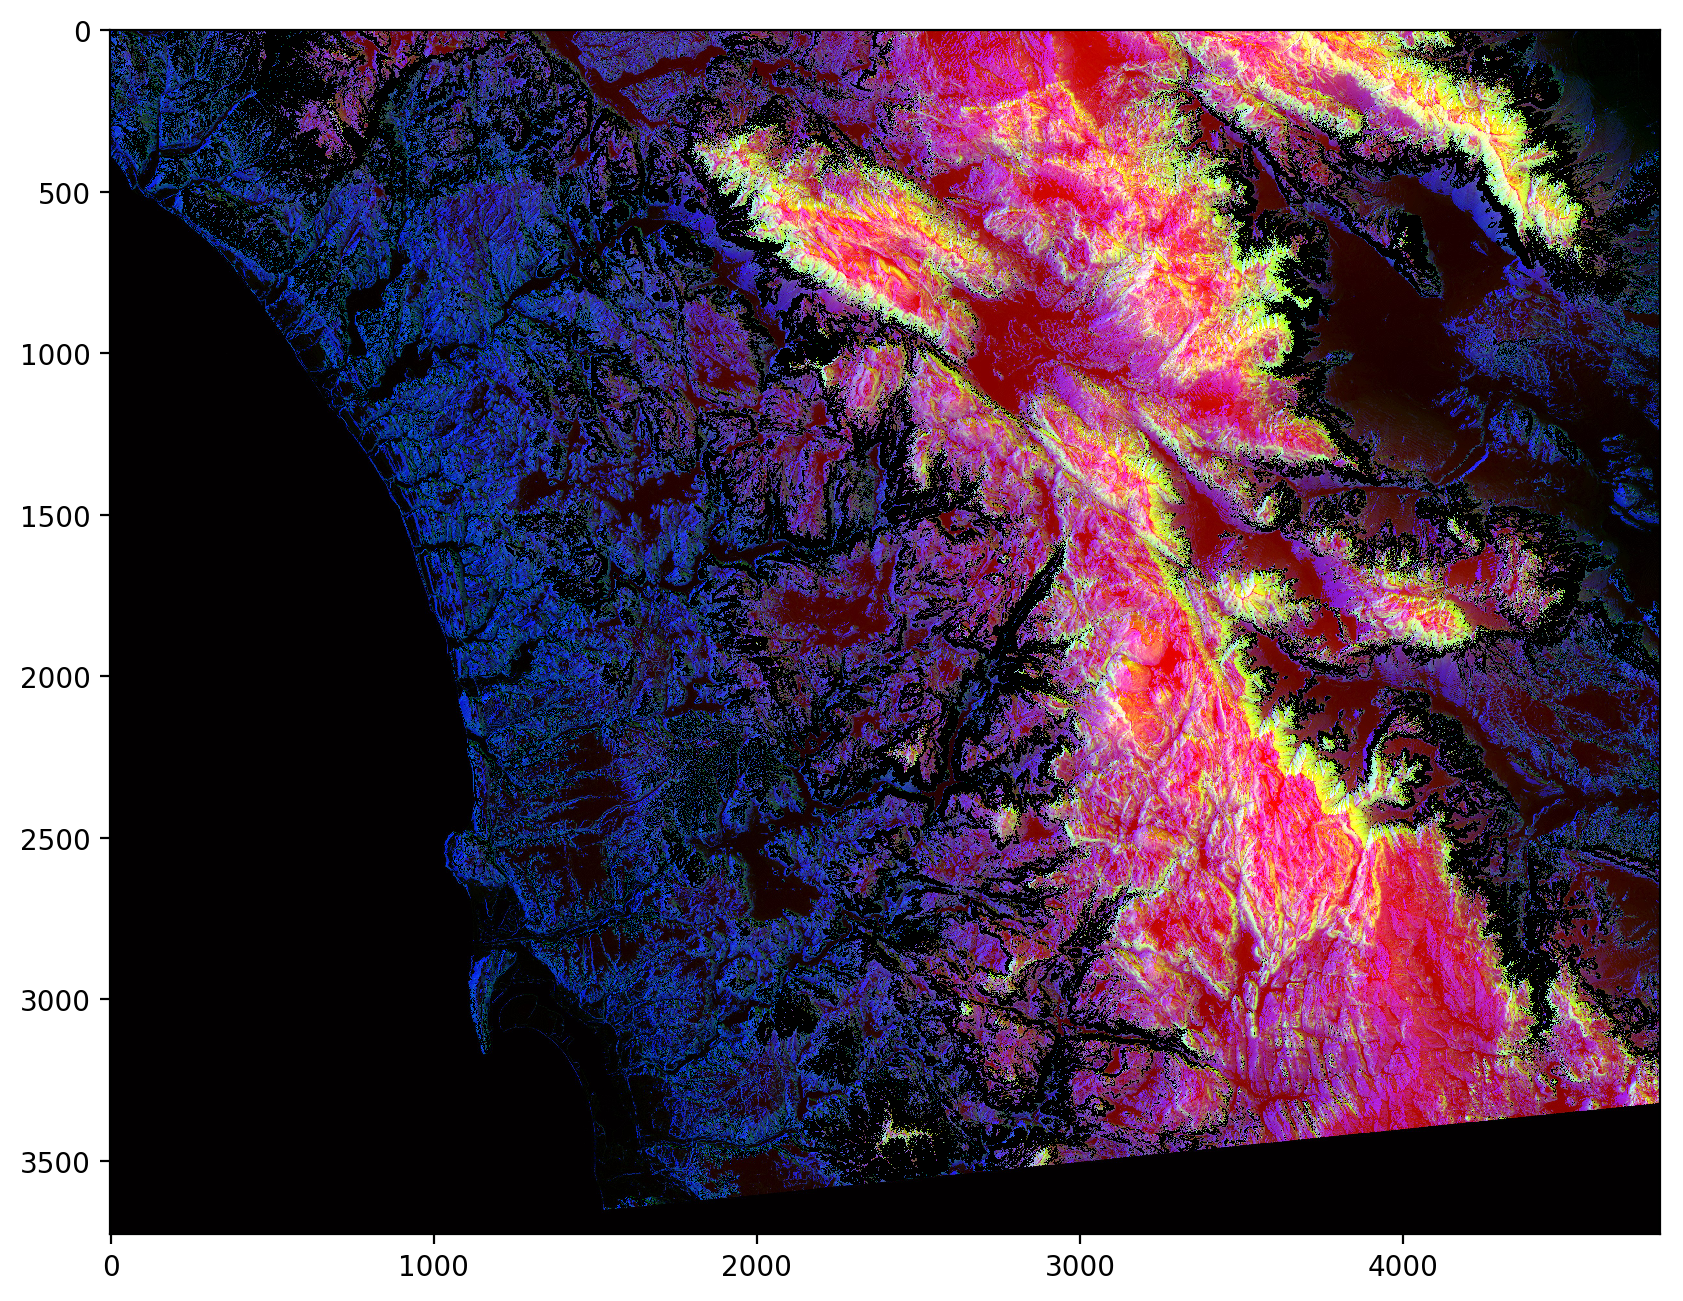

In [69]:
photo_data = imageio.imread('./sd-3layers.jpg')

red_mask   = photo_data[:, : ,0] < 150
green_mask = photo_data[:, : ,1] > 100
blue_mask  = photo_data[:, : ,2] < 100

final_mask = np.logical_and(red_mask, green_mask, blue_mask)
photo_data[final_mask] = 0
plt.figure(figsize=(10,10), dpi = 200)
plt.imshow(photo_data)

## 